In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Read the CSV file into a DataFrame
teams_stats = pd.read_csv('../basketballPlayoffs/teams_stats_analysis.csv')

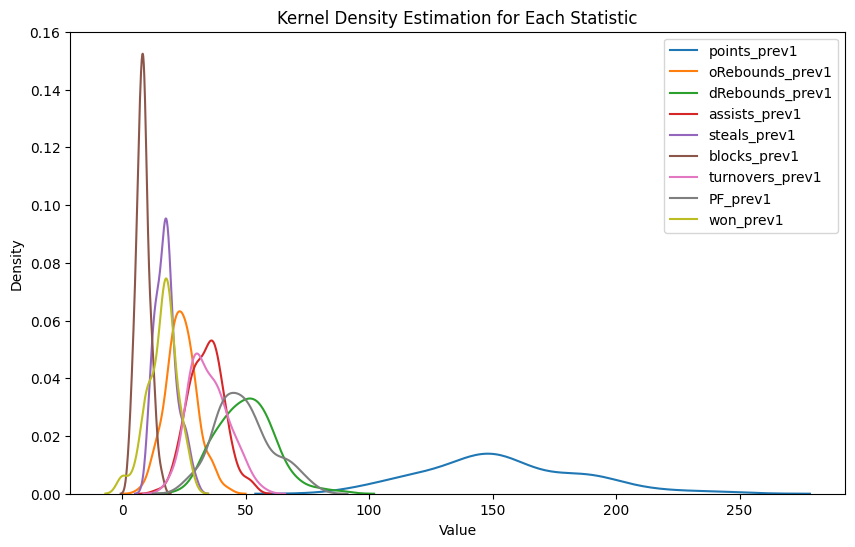

In [4]:
plt.figure(figsize=(10, 6))

columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
for column in columns:
    sb.kdeplot(teams_stats[column], label=column)

plt.xlabel('Value')
plt.title('Kernel Density Estimation for Each Statistic')
plt.legend()
plt.show()

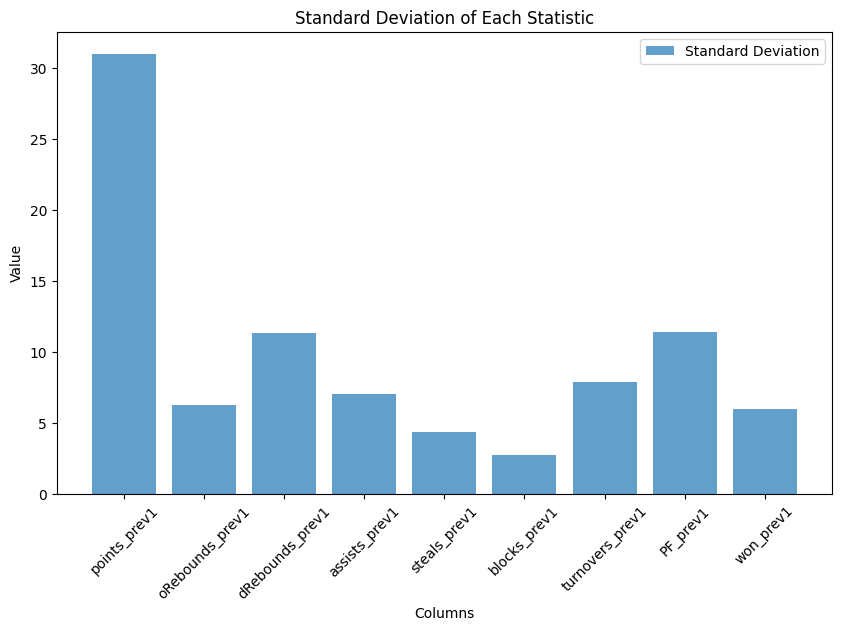

In [5]:
columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
std_deviation = []

for column in columns:
    std_deviation.append(teams_stats[column].std())

plt.figure(figsize=(10, 6))
plt.bar(columns, std_deviation, label='Standard Deviation', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Value')
plt.title('Standard Deviation of Each Statistic')
plt.legend(loc='upper right')
plt.show()

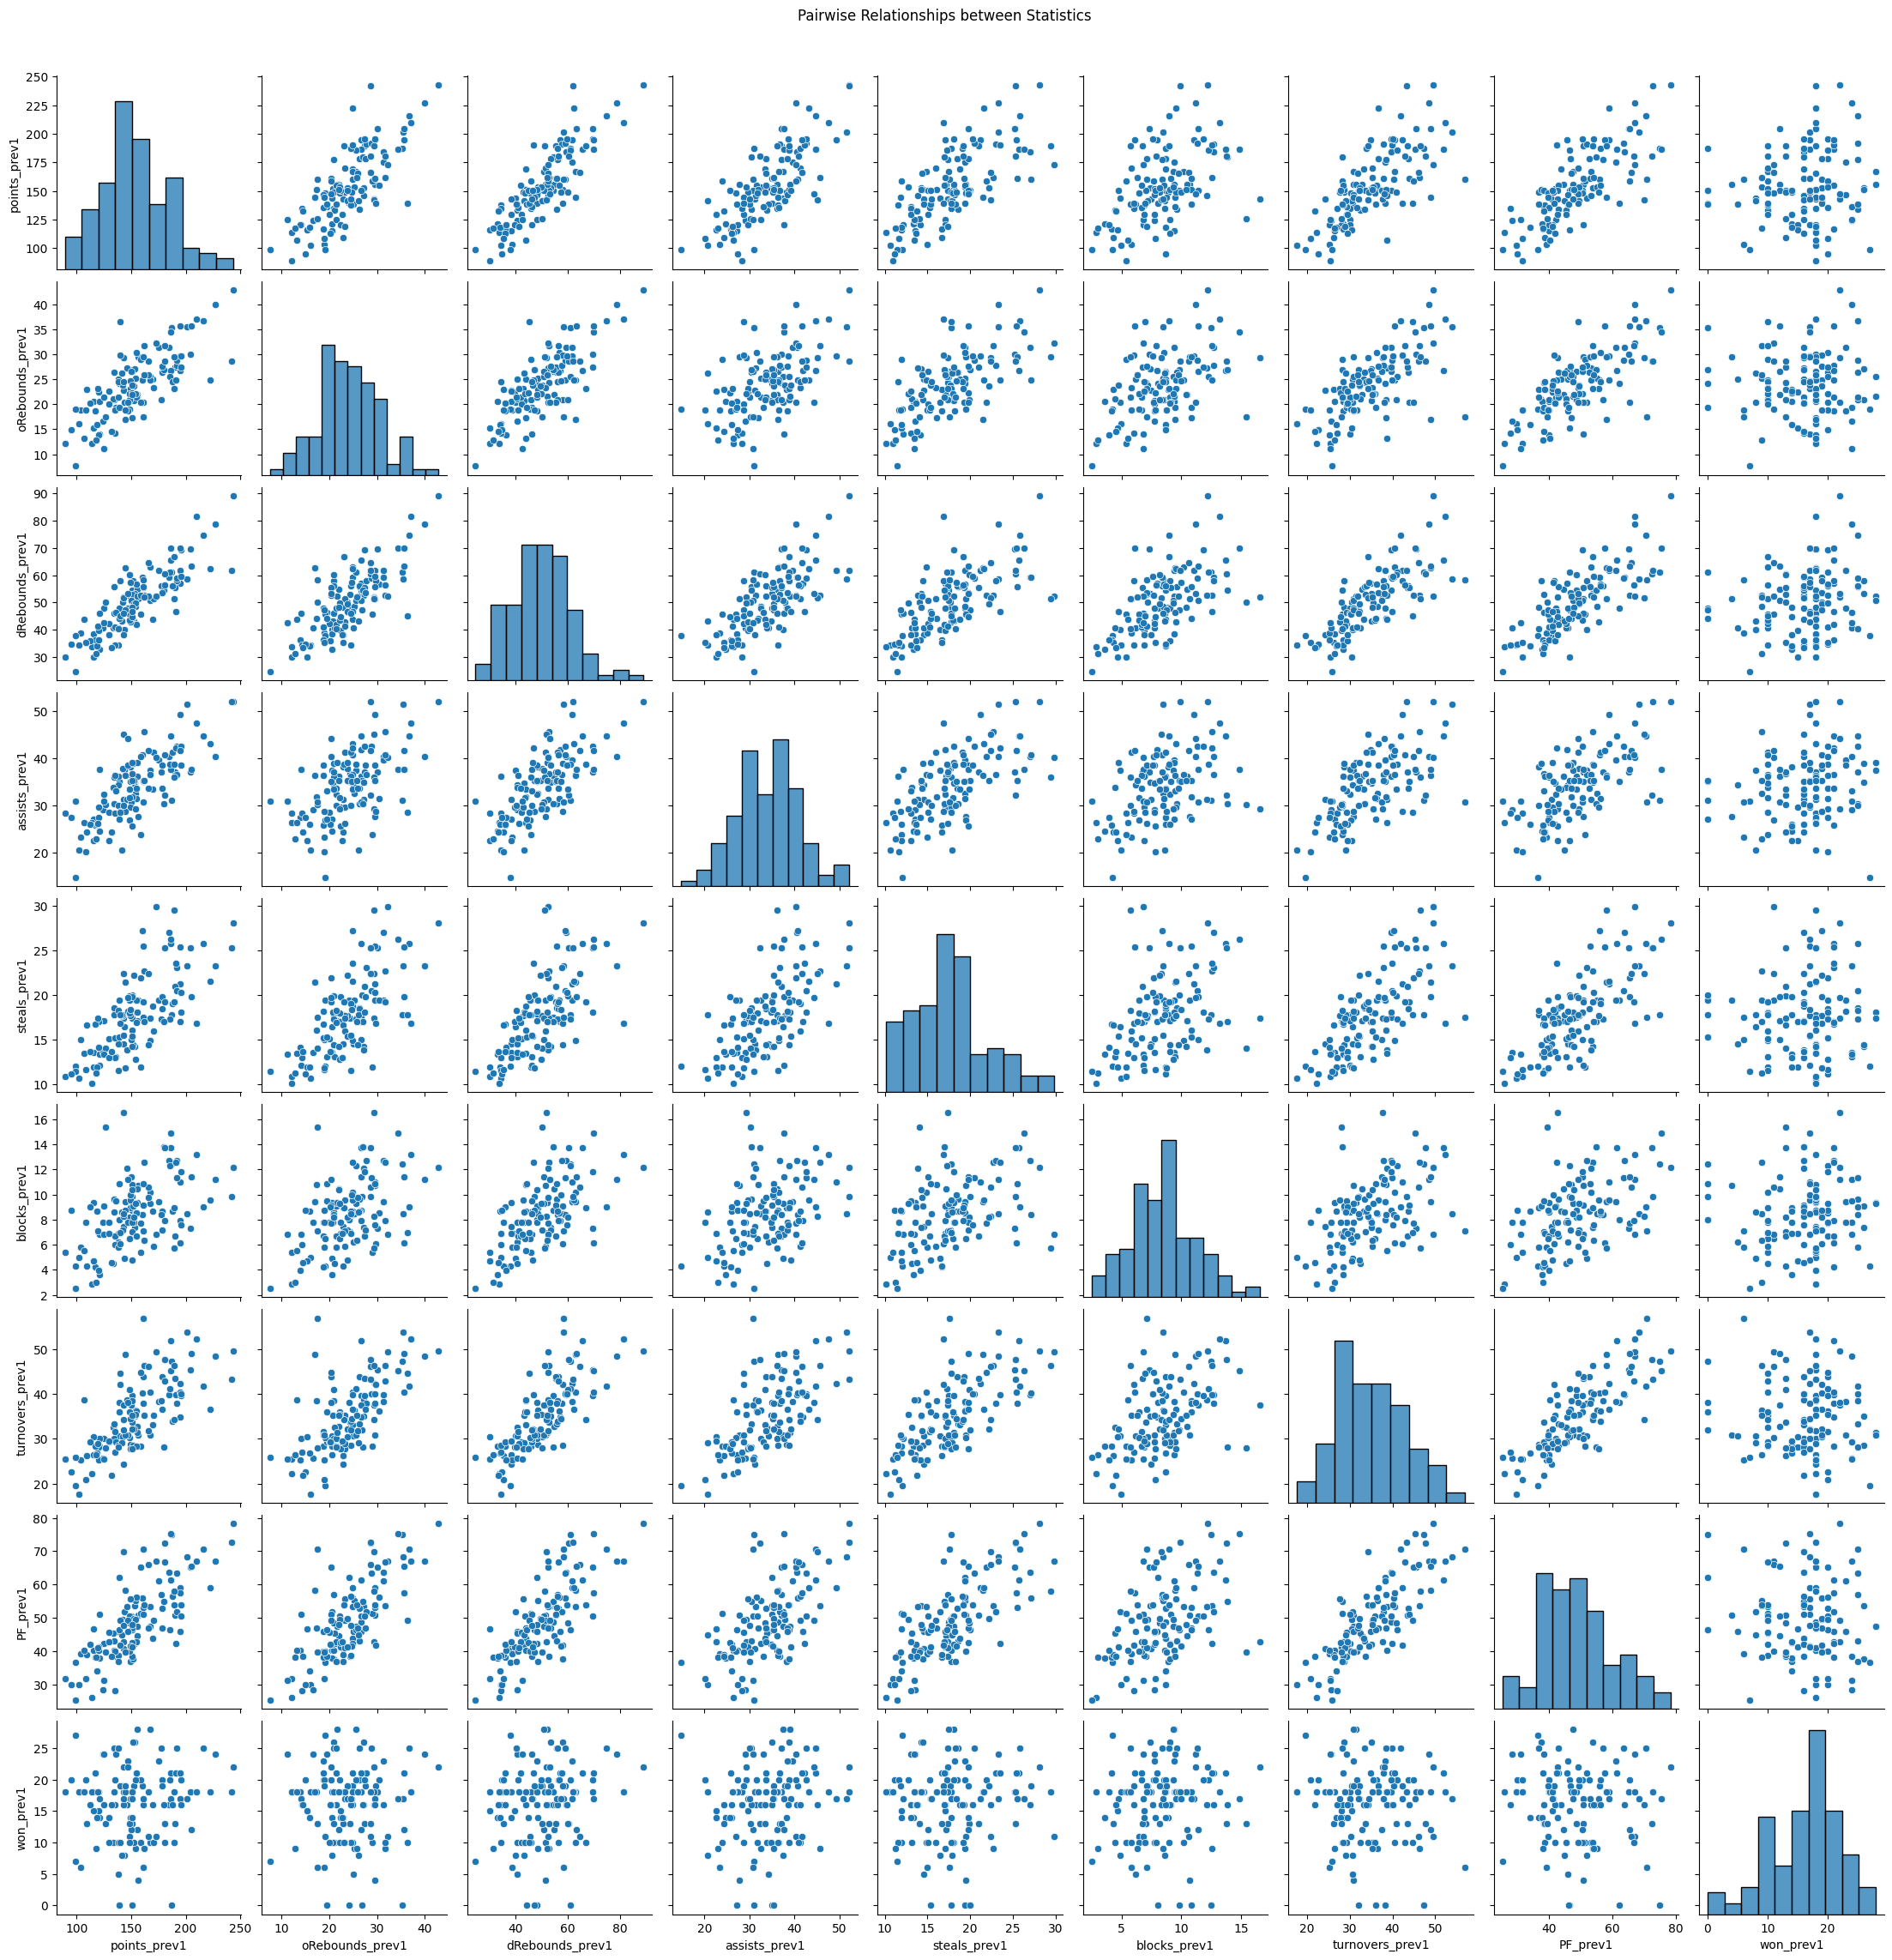

In [6]:
columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
sb.pairplot(teams_stats[columns])
plt.suptitle("Pairwise Relationships between Statistics", y=1.02)
plt.show()

{'points_prev1': -0.003804884508345657, 'oRebounds_prev1': 0.008681539329306917, 'dRebounds_prev1': 0.0183815750719801, 'assists_prev1': 0.012394369077972103, 'steals_prev1': -0.008206990704531389, 'blocks_prev1': 0.0014516271589939652, 'turnovers_prev1': -0.010295949603393403, 'PF_prev1': -0.012531698323829735, 'won_prev1': 0.01709308342099573}


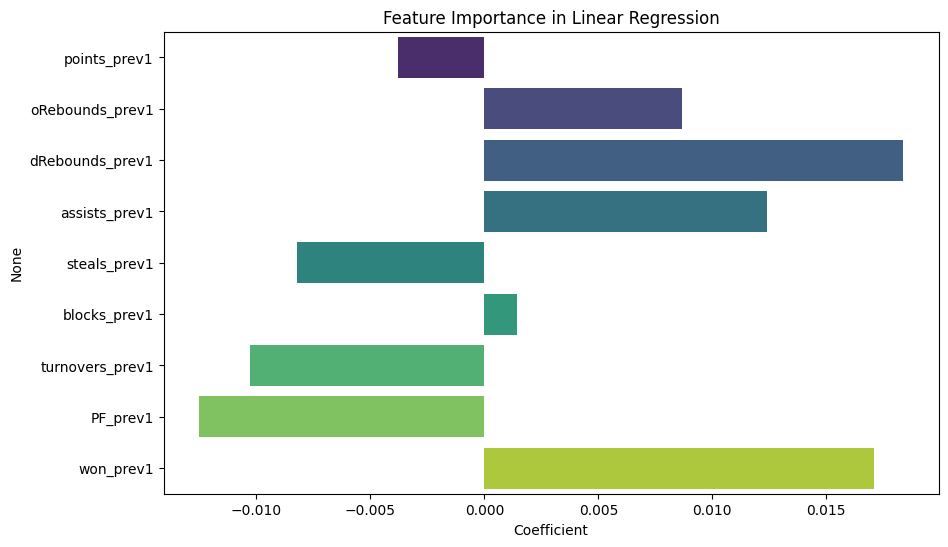

In [7]:
from sklearn.linear_model import LinearRegression

X = teams_stats.drop(['tmID', 'year', 'confID', 'playoff'], axis=1)
y = teams_stats['playoff']

model = LinearRegression()
model.fit(X, y)

feature_importance = pd.Series(model.coef_, index=X.columns)

lrRatingMult = {}
for feature, importance in zip(X.columns, feature_importance):
    lrRatingMult[feature] = importance
print(lrRatingMult)

plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette="viridis", legend=False)
plt.xlabel('Coefficient')
plt.title('Feature Importance in Linear Regression')
plt.show()

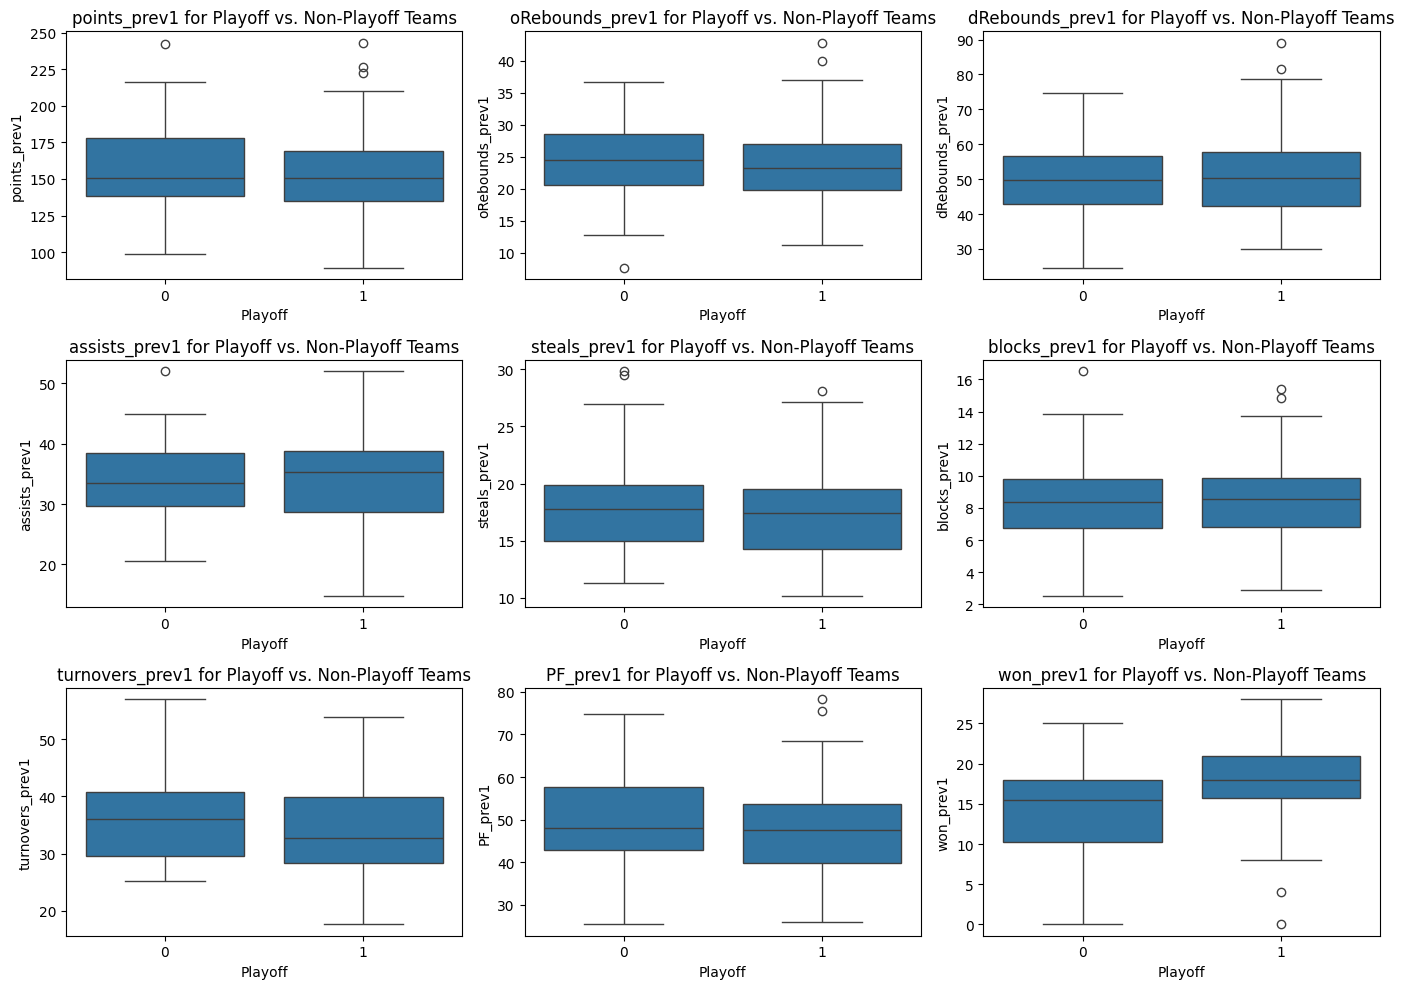

In [8]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sb.boxplot(x='playoff', y=column, data=teams_stats)
    plt.xlabel('Playoff')
    plt.ylabel(column)
    plt.title(f'{column} for Playoff vs. Non-Playoff Teams')

plt.tight_layout()
plt.show()

                     tmID      year  points_prev1  oRebounds_prev1  \
tmID             1.000000 -0.044970      0.020166        -0.122208   
year            -0.044970  1.000000      0.269703         0.150595   
points_prev1     0.020166  0.269703      1.000000         0.759208   
oRebounds_prev1 -0.122208  0.150595      0.759208         1.000000   
dRebounds_prev1 -0.026085  0.298003      0.849292         0.753762   
assists_prev1   -0.038286  0.237689      0.764235         0.549337   
steals_prev1    -0.018611  0.130180      0.716827         0.673610   
blocks_prev1    -0.070989  0.146559      0.497784         0.491086   
turnovers_prev1  0.053516  0.082575      0.723599         0.659584   
PF_prev1        -0.017531  0.103225      0.767330         0.739176   
confID           0.438321 -0.008169      0.020171        -0.140666   
playoff         -0.035850  0.066412     -0.026513        -0.022067   
won_prev1        0.028793  0.070301      0.120922         0.007891   

                 dR

<Axes: >

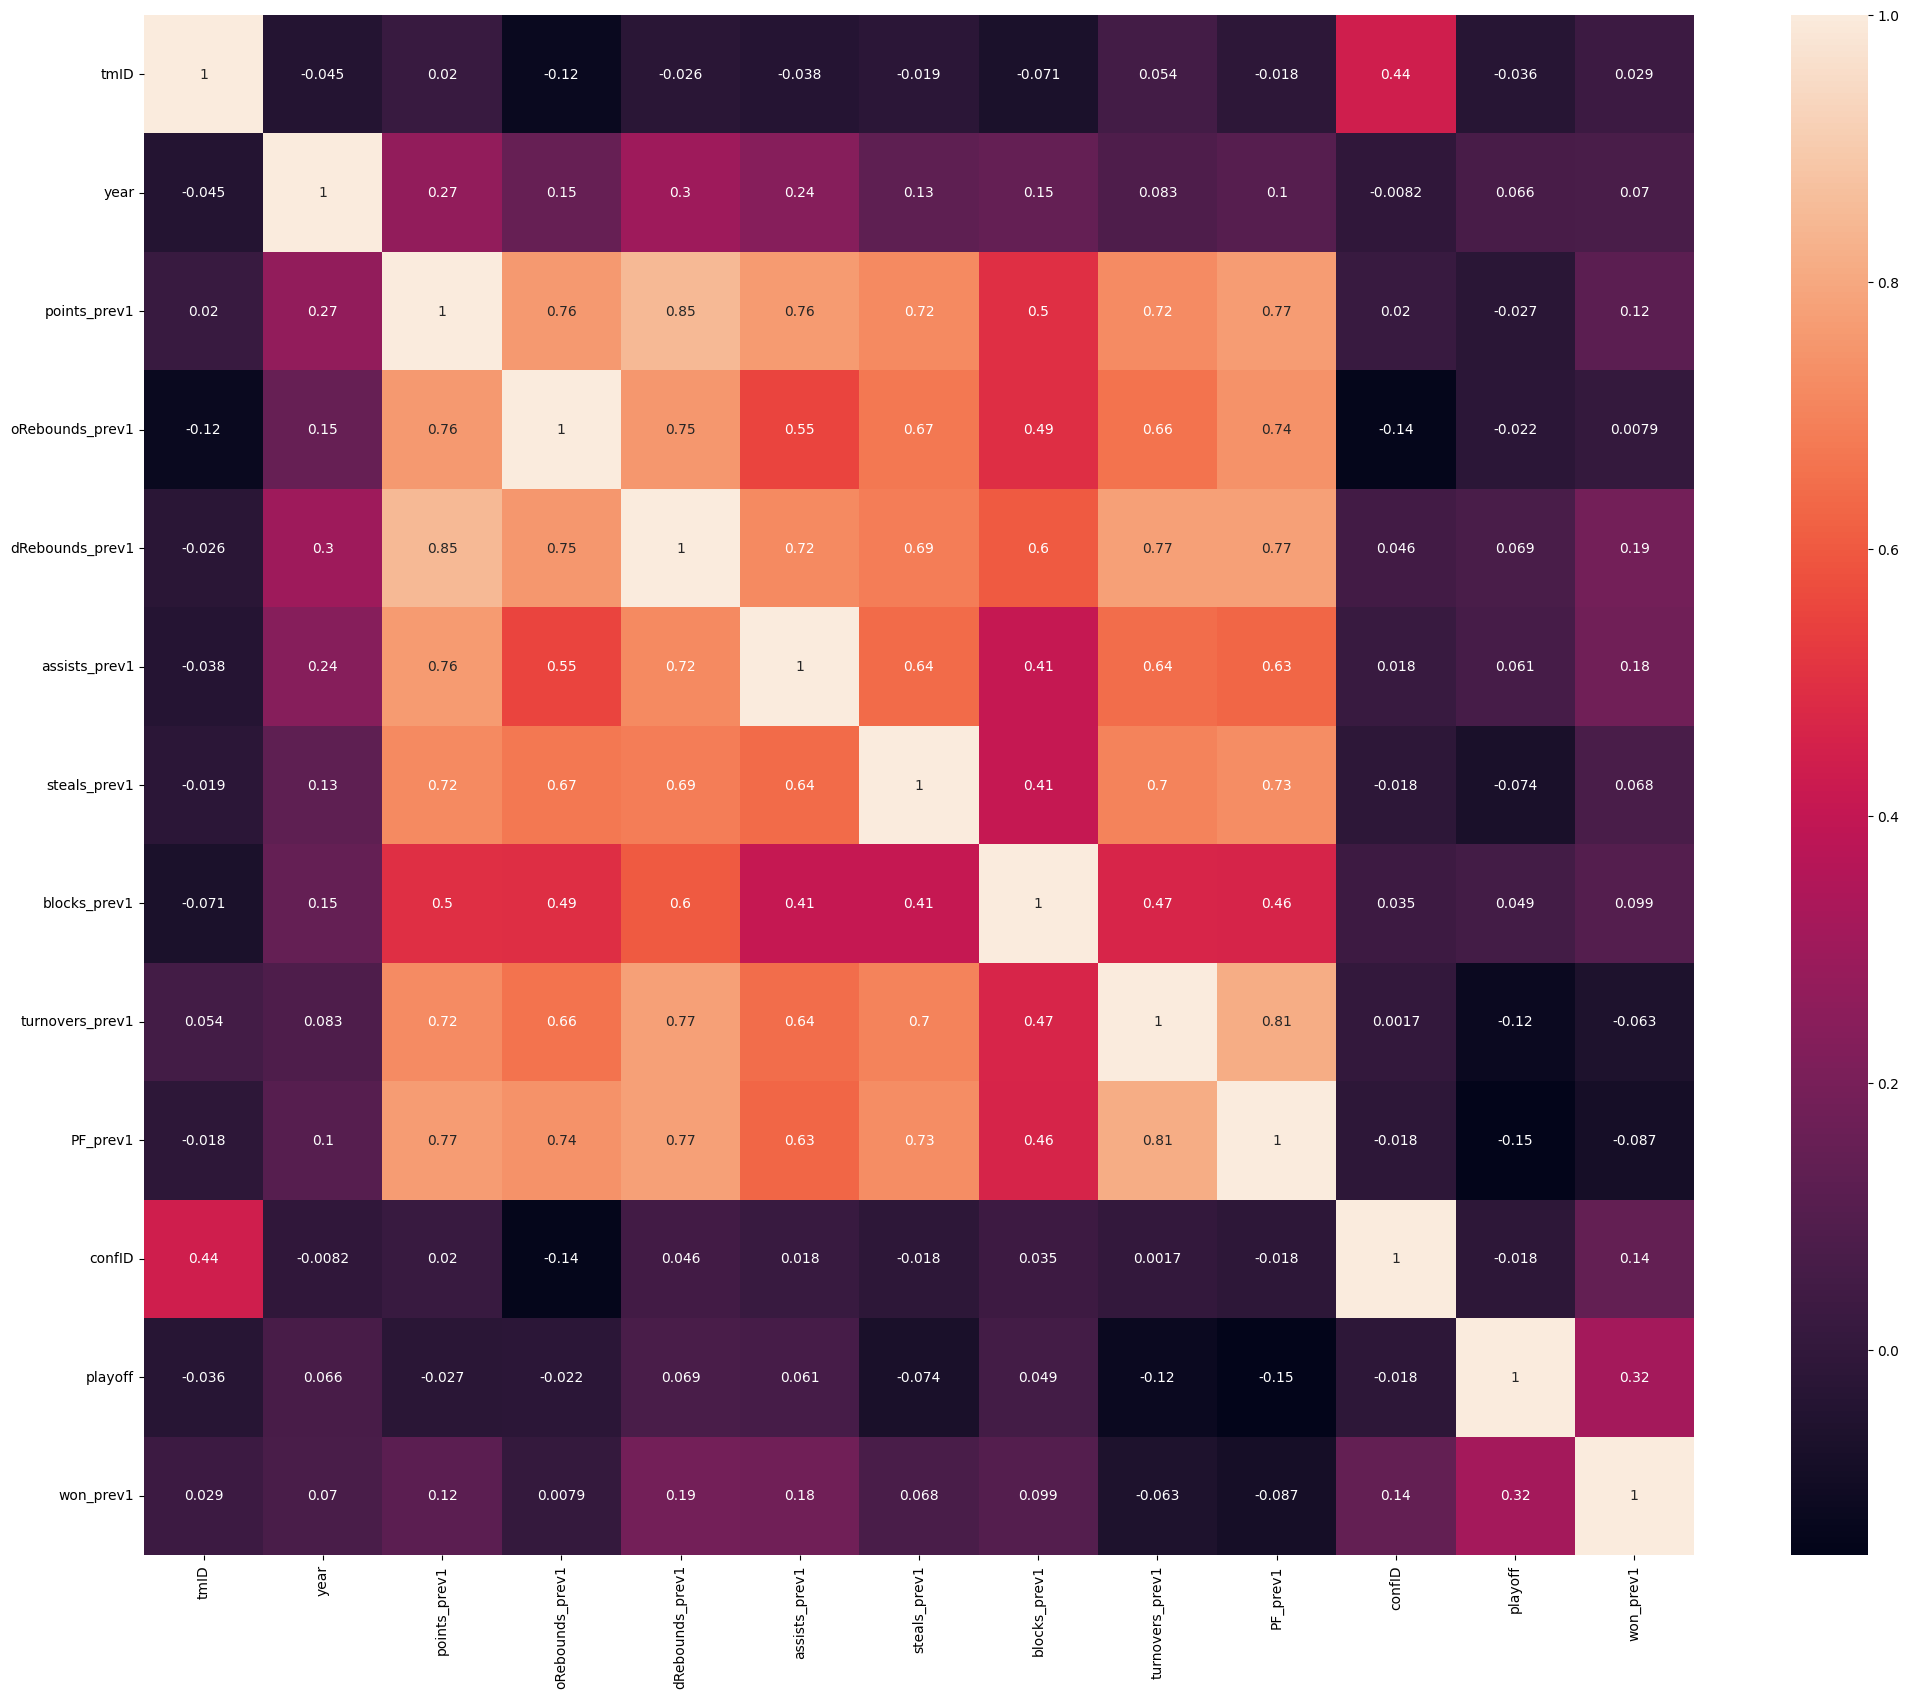

In [9]:
# HEATHMAP SHOWING CORRELATION BETWEEN INGAME STATS AND PLAYOFF QUALIFICATION
print(teams_stats.corr())
plt.subplots(figsize=(25,20))
sb.heatmap(teams_stats.corr(),annot=True)